Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   Etotal_1
0   -275.82
1   -276.23
2   -275.59
3   -274.99
4   -271.95
-834.27
-208.61
-535.9029130434782
Skewness: -0.11766629229699695
Kurtosis: -1.549043543551925
Distribution Type: Left Skewed Distribution


/tmp/ipykernel_853513/1797370794.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Etotal_1"].fillna(data["Etotal_1"].max(), inplace=True)


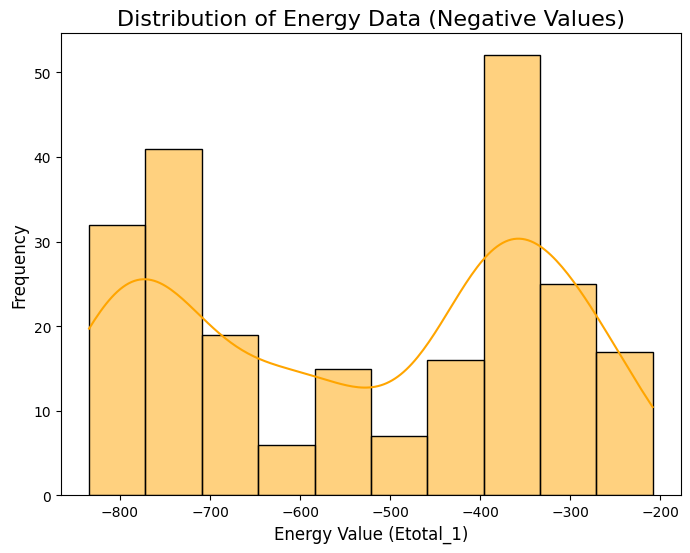

In [31]:
#Analysis of Energy Data
%pip install numpy
%pip install scikit-learn
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew, kurtosis
data = pd.read_csv('data.csv')
data["Etotal_1"].fillna(data["Etotal_1"].max(), inplace=True)
median = pd.DataFrame(data["Etotal_1"])
median.to_csv('data.csv', index=False)
print(data.head())
# Calculate min, max, and mean
median_values = np.median(data)
min_values = np.min(data)
max_values = np.max(data)
mean_values = np.mean(data)

# Print the values
print(min_values)
print(max_values)
print(mean_values)

# Write the values to a CSV file
summary_stats = pd.DataFrame({
    'Statistic': ['Min', 'Max', 'Mean', 'Median'],
    'Etotal_1': [min_values, max_values, mean_values, median_values]
})
summary_stats.to_csv('summary_statistics.csv', index=False)
# Compute Skewness and Kurtosis
data_skewness = skew(data['Etotal_1'])
data_kurtosis = kurtosis(data['Etotal_1'])
print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

# Write skewness and kurtosis to a CSV file
distribution_stats = pd.DataFrame({
    'Statistic': ['Skewness', 'Kurtosis'],
    'Value': [data_skewness, data_kurtosis]
})
distribution_stats.to_csv('distribution_statistics.csv', index=False)
# Determine the type of distribution based on skewness and kurtosis
if abs(data_skewness) < 0.5 and abs(data_kurtosis - 3) < 1:
    distribution_type = 'Normal Distribution'
elif data_skewness > 0:
    distribution_type = 'Right Skewed Distribution'
elif data_skewness < 0:
    distribution_type = 'Left Skewed Distribution'
elif abs(data_kurtosis - 3) > 1:
    distribution_type = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type = 'Platykurtic Distribution (Light Tails)'

print(f"Distribution Type: {distribution_type}")
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Etotal_1'], kde=True, color='orange', bins=10)

# Set plot labels and title
plt.title('Distribution of Energy Data (Negative Values)', fontsize=16)
plt.xlabel('Energy Value (Etotal_1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Save the plot as a PNG file
plt.savefig('Etotal_1.png')
# Show the plot
plt.show()



Shift Value: 834.77
Transformed Data Summary:
count    230.000000
mean       5.162688
std        1.390903
min       -0.693147
25%        4.351695
50%        5.757323
75%        6.128881
max        6.439606
Name: Etotal_1_log, dtype: float64


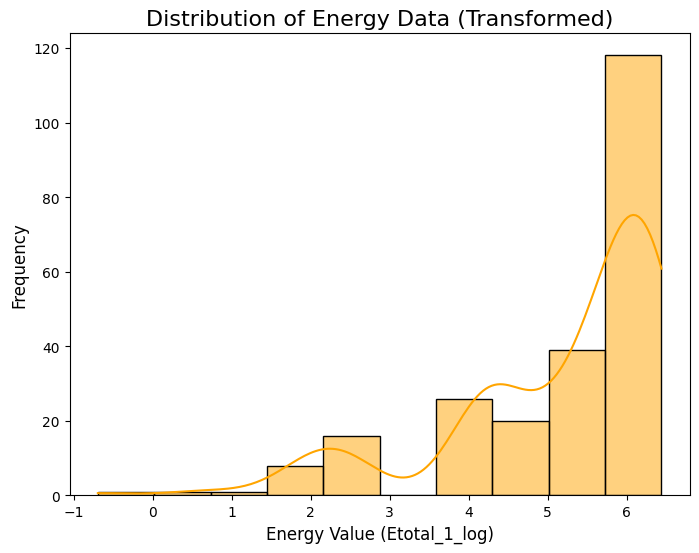

Skewness (Transformed Data): -1.4737898550558233
Kurtosis (Transformed Data): 1.6939077446946191
Distribution Type (Transformed Data): Left Skewed Distribution


In [59]:
#Sift the data and try to use log transformation

# Define the column name
column_name = 'Etotal_1'

# Shift the data to make it positive
shift_value = abs(min_values) + 0.5  # Adding 1 to ensure all values are positive
data[column_name + "_log"] = np.log(data[column_name] + shift_value)

# Save the transformed data
data.to_csv("data_transformed.csv", index=False)

# Print basic statistics
print(f"Shift Value: {shift_value}")
print("Transformed Data Summary:")
print(data[column_name + "_log"].describe())

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data[column_name + '_log'], kde=True, color='orange', bins=10)

# Set plot labels and title
plt.title('Distribution of Energy Data (Transformed)', fontsize=16)
plt.xlabel('Energy Value (Etotal_1_log)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Save the plot as a PNG file
plt.savefig('Etotal_1_transformed.png')
# Show the plot
plt.show()

# Compute Skewness and Kurtosis for transformed data
data_transformed_skewness = skew(data[column_name + '_log'])
data_transformed_kurtosis = kurtosis(data[column_name + '_log'])

# Write skewness and kurtosis to a CSV file
distribution_stats_transformed = pd.DataFrame({
    'Statistic': ['Skewness', 'Kurtosis'],
    'Value': [data_transformed_skewness, data_transformed_kurtosis]
})
distribution_stats_transformed.to_csv('distribution_statistics_transformed.csv', index=False)

# Determine the type of distribution based on skewness and kurtosis
if abs(data_transformed_skewness) < 0.5 and abs(data_transformed_kurtosis - 3) < 1:
    distribution_type_transformed = 'Normal Distribution'
elif data_transformed_skewness > 0:
    distribution_type_transformed = 'Right Skewed Distribution'
elif data_transformed_skewness < 0:
    distribution_type_transformed = 'Left Skewed Distribution'
elif abs(data_transformed_kurtosis - 3) > 1:
    distribution_type_transformed = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type_transformed = 'Platykurtic Distribution (Light Tails)'

print(f"Skewness (Transformed Data): {data_transformed_skewness}")
print(f"Kurtosis (Transformed Data): {data_transformed_kurtosis}")
print(f"Distribution Type (Transformed Data): {distribution_type_transformed}")


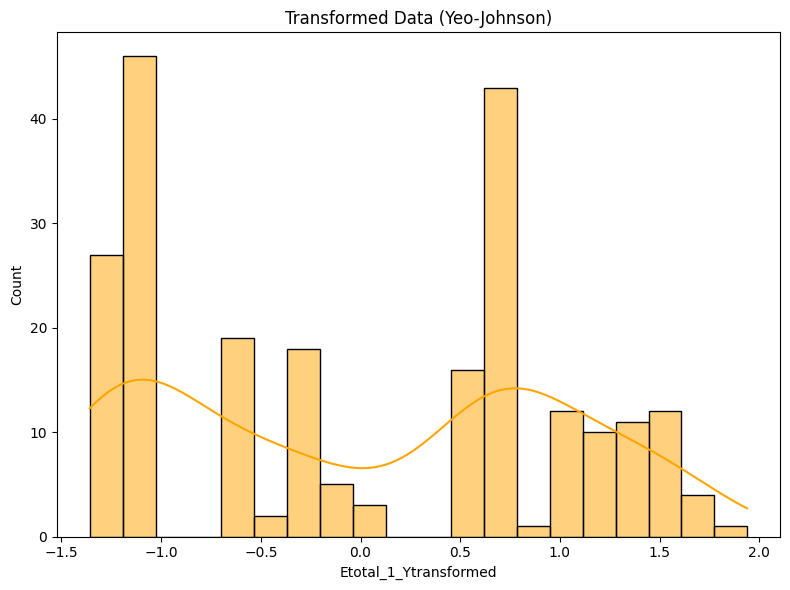


Transformed Data Statistics:
Skewness: 0.06945456578679414
Kurtosis: -1.4813016742168599
Skewness (Transformed Data): 0.06945456578679414
Kurtosis (Transformed Data): -1.4813016742168599
Distribution Type (Transformed Data): Right Skewed Distribution
Optimal Lambda: [1.64907296]


In [61]:
# Apply Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
data_transformed = scaler.fit_transform(data[[column_name]])

# Convert the transformed data back to a DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=[column_name + '_Ytransformed'])
data_transformed.to_csv('Ytransformed_data.csv', index=False)

# Plot the transformed data
plt.figure(figsize=(8, 6))

# Plot transformed data
sns.histplot(data_transformed[column_name + '_Ytransformed'], kde=True, color='orange', bins=20)
plt.title('Transformed Data (Yeo-Johnson)')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Etotal_1_Ytransformed.png')

# Show the plot
plt.show()


print("\nTransformed Data Statistics:")
print(f"Skewness: {data_transformed[column_name + '_Ytransformed'].skew()}")
print(f"Kurtosis: {data_transformed[column_name + '_Ytransformed'].kurtosis()}")

# Write skewness and kurtosis to a CSV file
distribution_stats_Ytransformed = pd.DataFrame({
    'Statistic': ['Skewness', 'Kurtosis'],
    'Value': [data_transformed[column_name + '_Ytransformed'].skew(), data_transformed[column_name + '_Ytransformed'].kurtosis()]
})
distribution_stats_Ytransformed.to_csv('distribution_statistics_Ytransformed.csv', index=False)

# Determine the type of distribution based on skewness and kurtosis
if abs(data_transformed[column_name + '_Ytransformed'].skew()) < 0.5 and abs(data_transformed[column_name + '_Ytransformed'].kurtosis() - 3) < 1:
    distribution_type_transformed = 'Normal Distribution'
elif data_transformed[column_name + '_Ytransformed'].skew() > 0:
    distribution_type_transformed = 'Right Skewed Distribution'
elif data_transformed[column_name + '_Ytransformed'].skew() < 0:
    distribution_type_transformed = 'Left Skewed Distribution'
elif abs(data_transformed[column_name + '_Ytransformed'].kurtosis() - 3) > 1:
    distribution_type_transformed = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type_transformed = 'Platykurtic Distribution (Light Tails)'

print(f"Skewness (Transformed Data): {data_transformed[column_name + '_Ytransformed'].skew()}")
print(f"Kurtosis (Transformed Data): {data_transformed[column_name + '_Ytransformed'].kurtosis()}")
print(f"Distribution Type (Transformed Data): {distribution_type_transformed}")

print(f"Optimal Lambda: {scaler.lambdas_}")


/home/reyhaneh/miniconda3/envs/__arabic_reshaper@3.0.0/lib/python3.13/site-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (230). n_quantiles is set to n_samples.
  warnings.warn(


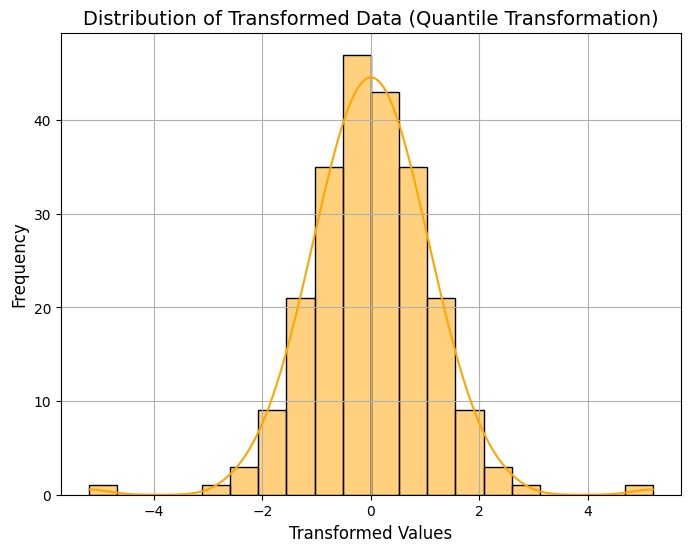

Skewness (After Transformation): -2.0113468394773394e-06
Kurtosis (After Transformation): 3.3084450439266186
Distribution Type: Normal Distribution


In [63]:
#Quantile Transformation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew, kurtosis

# Load the data
data = pd.read_csv("data.csv")

# Define the column name
column_name = "Etotal_1"  # Change this to match your column name

# Initialize QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Apply transformation
data_transformed = quantile_transformer.fit_transform(data[[column_name]])

# Convert transformed data back to DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=[column_name + "_Qtransformed"])

# Save transformed data
data_transformed.to_csv("data_Qtransformed.csv", index=False)

# Plot transformed data
plt.figure(figsize=(8, 6))
sns.histplot(data_transformed[column_name + "_Qtransformed"], kde=True, color='ORANGE', bins=20)
plt.title('Distribution of Transformed Data (Quantile Transformation)', fontsize=14)
plt.xlabel('Transformed Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.savefig("Etotal_1_Qtransformed.png")
plt.show()

# Compute skewness and kurtosis
skewness = skew(data_transformed[column_name + "_Qtransformed"])
kurt = kurtosis(data_transformed[column_name + "_Qtransformed"])

# Save distribution statistics
distribution_stats = pd.DataFrame({
    "Statistic": ["Skewness", "Kurtosis"],
    "Value": [skewness, kurt]
})
distribution_stats.to_csv("distribution_statistics_Qtransformed.csv", index=False)

# Print results
print(f"Skewness (After Transformation): {skewness}")
print(f"Kurtosis (After Transformation): {kurt}")

# Determine the type of distribution
if abs(skewness) < 0.5 and abs(kurt - 3) < 1:
    distribution_type = "Normal Distribution"
elif skewness > 0:
    distribution_type = "Right Skewed"
elif skewness < 0:
    distribution_type = "Left Skewed"
elif abs(kurt - 3) > 1:
    distribution_type = "Leptokurtic (Heavy Tails)"
else:
    distribution_type = "Platykurtic (Light Tails)"

print(f"Distribution Type: {distribution_type}")


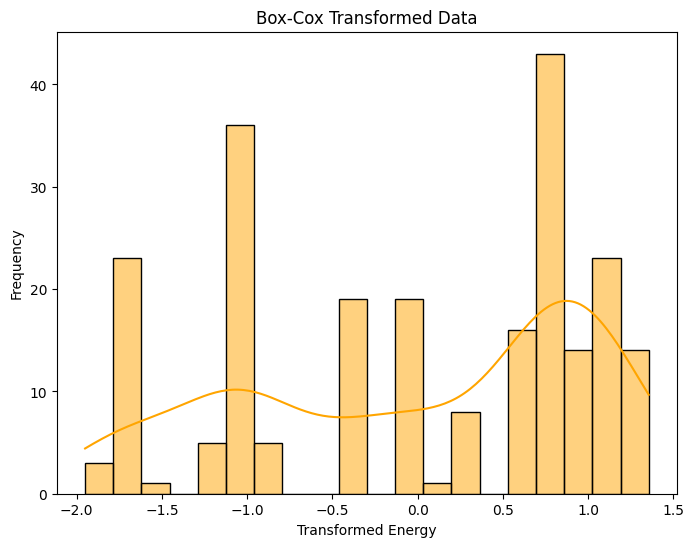

Shift Value: 834.5699999999999
Optimal Lambda (Box-Cox): [0.584812]
Skewness after Box-Cox: -0.43133236280852144
Kurtosis after Box-Cox: -1.2725063827224965
Distribution Type (Box-Cox): Left Skewed Distribution


In [64]:
#box-cox transformation-shifting the data to make it positive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer

# Load data
data = pd.read_csv("data.csv")

# Define column name
column_name = 'Etotal_1'  # Change this to match your column name

# Step 1: Shift data to make it positive
min_value = data[column_name].min()
shift_value = abs(min_value) + 0.3  # Ensures all values are positive
data[column_name + "_shifted"] = data[column_name] + shift_value

# Step 2: Apply Box-Cox Transformation
scaler = PowerTransformer(method='box-cox')
data[column_name + "_BoxCox"] = scaler.fit_transform(data[[column_name + "_shifted"]])

# Save transformed data
data.to_csv("data_BoxCox_transformed.csv", index=False)

# Step 3: Plot Distribution of Transformed Data
plt.figure(figsize=(8, 6))
sns.histplot(data[column_name + "_BoxCox"], kde=True, color='orange', bins=20)
plt.title('Box-Cox Transformed Data')
plt.xlabel('Transformed Energy')
plt.ylabel('Frequency')
plt.savefig('BoxCox_transformed.png')
plt.show()

# Compute Skewness and Kurtosis
skewness = skew(data[column_name + "_BoxCox"])
kurt = kurtosis(data[column_name + "_BoxCox"])

# Save statistics
stats_df = pd.DataFrame({'Statistic': ['Skewness', 'Kurtosis'], 'Value': [skewness, kurt]})
stats_df.to_csv("BoxCox_distribution_stats.csv", index=False)

# Print summary
print(f"Shift Value: {shift_value}")
print(f"Optimal Lambda (Box-Cox): {scaler.lambdas_}")
print(f"Skewness after Box-Cox: {skewness}")
print(f"Kurtosis after Box-Cox: {kurt}")

# Determine the type of distribution based on skewness and kurtosis
if abs(skewness) < 0.5 and abs(kurt - 3) < 1:
    distribution_type_BoxCox = 'Normal Distribution'
elif skewness > 0:
    distribution_type_BoxCox = 'Right Skewed Distribution'
elif skewness < 0:
    distribution_type_BoxCox = 'Left Skewed Distribution'
elif abs(kurt - 3) > 1:
    distribution_type_BoxCox = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type_BoxCox = 'Platykurtic Distribution (Light Tails)'

print(f"Distribution Type (Box-Cox): {distribution_type_BoxCox}")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
data_trans = pd.read_csv('transformed_data.csv')
scaler = MinMaxScaler()
# Apply Min-Max normalization to the transformed data
data_normalized = scaler.fit_transform(data_trans[['Etotal_1_transformed']])
# Convert the result back into a DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=['Etotal_1_normalized'])
data_normalized.to_csv('normalized_data.csv', index=False)

# Plot the original and normalized data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot original transformed data
plt.subplot(1, 2, 1)
sns.histplot(data_transformed['Etotal_1_transformed'], kde=True, color='orange', bins=20)
plt.title('Transformed Data (Yeo-Johnson)')

# Plot normalized data
plt.subplot(1, 2, 2)
sns.histplot(data_normalized['Etotal_1_normalized'], kde=True, color='green', bins=20)
plt.title('Normalized Data (Min-Max)')

plt.tight_layout()
plt.show()
# Print statistics to compare the before and after transformation
print("Original Data Statistics:")
print(f"Skewness: {data['Etotal_1'].skew()}")
print(f"Kurtosis: {data['Etotal_1'].kurtosis()}")

print("\nTransformed Data Statistics:")
print(f"Skewness: {data_transformed['Etotal_1_transformed'].skew()}")
print(f"Kurtosis: {data_transformed['Etotal_1_transformed'].kurtosis()}")

FileNotFoundError: [Errno 2] No such file or directory: 'transformed_data.csv'

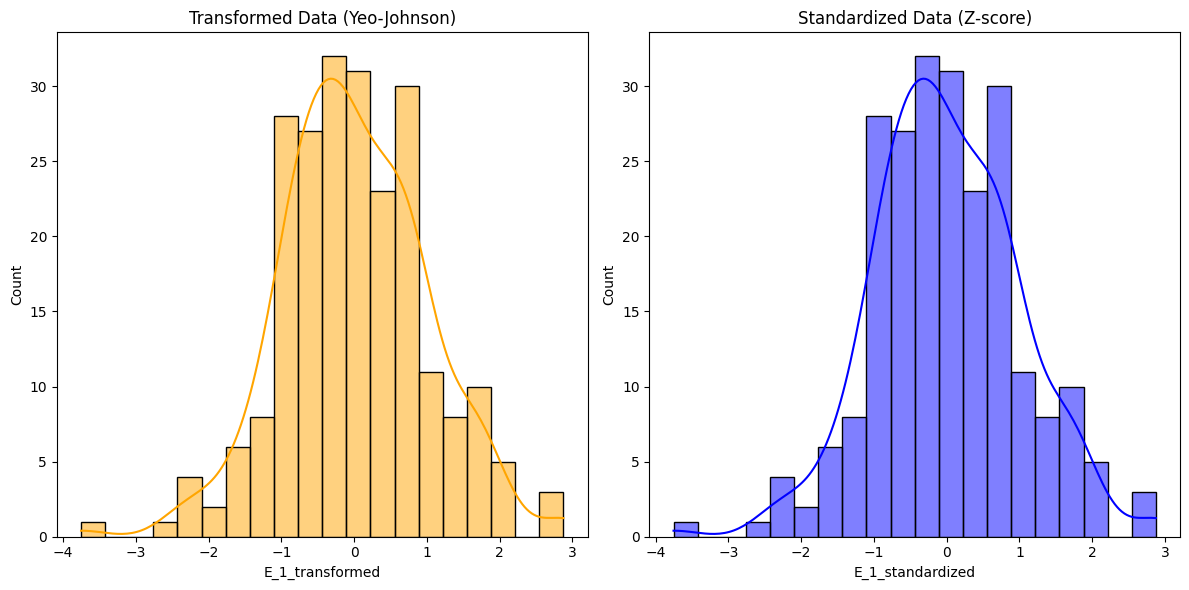

Original Data Statistics:
Skewness: 0.8667540657878451
Kurtosis: 2.410913732619287

Transformed Data Statistics:
Skewness: 0.028971532182264597
Kurtosis: 0.7499667601645505
Skewness (Standardized Data): 0.028782244070494286
Kurtosis (Standardized Data): 0.7077880421005389
Distribution Type (Standardized Data): Right Skewed Distribution
Distribution Type: Right Skewed Distribution


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
data_trans = pd.read_csv('transformed_data.csv')    
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization (Z-score normalization) to the transformed data
data_standardized = scaler.fit_transform(data_trans[['Etotal_1_transformed']])

# Convert the result back into a DataFrame

data_standardized = pd.DataFrame(data_standardized, columns=['Etotal_1_standardized'])
data_standardized.to_csv('standardized_data.csv', index=False)
# Plot the original and standardized data
plt.figure(figsize=(12, 6))

# Plot original transformed data
plt.subplot(1, 2, 1)
sns.histplot(data_transformed['Etotal_1_transformed'], kde=True, color='orange', bins=20)
plt.title('Transformed Data (Yeo-Johnson)')

# Plot standardized data
plt.subplot(1, 2, 2)
sns.histplot(data_standardized['Etotal_1_standardized'], kde=True, color='blue', bins=20)
plt.title('Standardized Data (Z-score)')

plt.tight_layout()
plt.show()
# Print statistics to compare the before and after transformation
print("Original Data Statistics:")
print(f"Skewness: {data['Etotal_1'].skew()}")
print(f"Kurtosis: {data['Etotal_1'].kurtosis()}")

print("\nTransformed Data Statistics:")
print(f"Skewness: {data_transformed['Etotal_1_transformed'].skew()}")
print(f"Kurtosis: {data_transformed['Etotal_1_transformed'].kurtosis()}")
# Compute Skewness and Kurtosis for standardized data
data_standardized_skewness = skew(data_standardized['Etotal_1_standardized'])
data_standardized_kurtosis = kurtosis(data_standardized['Etotal_1_standardized'])
print(f"Skewness (Standardized Data): {data_standardized_skewness}")
print(f"Kurtosis (Standardized Data): {data_standardized_kurtosis}")

# Determine the type of distribution based on skewness and kurtosis
if abs(data_standardized_skewness) < 0.5 and abs(data_standardized_kurtosis - 3) < 1:
    distribution_type_standardized = 'Normal Distribution'
elif data_standardized_skewness > 0:
    distribution_type_standardized = 'Right Skewed Distribution'
elif data_standardized_skewness < 0:
    distribution_type_standardized = 'Left Skewed Distribution'
elif abs(data_standardized_kurtosis - 3) > 1:
    distribution_type_standardized = 'Leptokurtic Distribution (Heavy Tails)'
else:
    distribution_type_standardized = 'Platykurtic Distribution (Light Tails)'

print(f"Distribution Type (Standardized Data): {distribution_type_standardized}")

print(f"Distribution Type: {distribution_type}")